In [1]:
import numpy as np
#import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import norm
from pylab import *
import pylab as p
from scipy import integrate
matplotlib.rcParams['text.usetex'] = True

In [20]:
beta=1;gamma=3;N=10
def f(x,y,z):
    f=-beta*x*y
    return f
def g(x,y,z):
    g=beta*x*y-gamma*y
    return g
def h(x,y,z):
    g=gamma*y
    return g
A=np.array([[sqrt(2)/2,sqrt(2)],[sqrt(3/2),0]])

In [3]:
def dX_dt(X, t=0):
    return array([f(X[0],X[1],X[2]),g(X[0],X[1],X[2]),h(X[0],X[1],X[2])])
t = linspace(0, 20,  500)              # time
X0 = array([9.5,0.5,0]) 
X=integrate.odeint(dX_dt, X0, t)
  

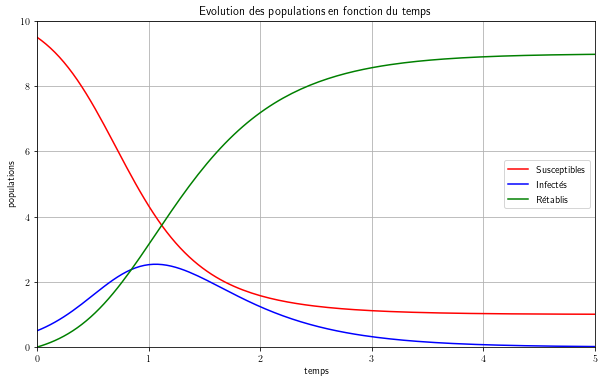

In [4]:
S,I,R = X.T
f1 = p.figure(figsize=(10,6))
plt.plot(t, S, 'r-', label='Susceptibles' )
plt.plot(t, I  , 'b-', label='Infectés')
plt.plot(t, R  , 'g-', label='Rétablis')
plt.grid()
plt.legend(loc='best')
plt.xlabel('temps')
plt.ylabel('populations')
plt.xlim(0,5)
plt.ylim(0,10)
plt.title('Evolution des populations en fonction du temps')
f1.savefig('graphesFonctionsSIR_NP.pdf')

In [5]:
def ARes(X):
    Y=A.dot(np.transpose(X[1:3]))
    return np.transpose(Y)
Sq2=sqrt(2)

L'espace des phases avec les points fixes, les isoclines, le champ de vecteurs.


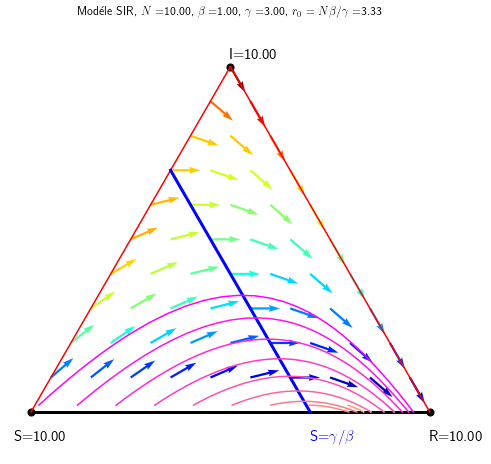

In [21]:
f2=plt.figure(figsize=(8,8))
S=np.array([N,0,0]);R=np.array([0,0,N]);I=np.array([0,N,0])
plt.plot([ARes(S)[0],ARes(R)[0]],[ARes(S)[1],ARes(R)[1]],'black',lw=3)
plt.plot([ARes(S)[0],ARes(I)[0]],[ARes(S)[1],ARes(I)[1]],'red')
plt.plot([ARes(I)[0],ARes(R)[0]],[ARes(I)[1],ARes(R)[1]],'red')

plt.scatter(ARes(S)[0],ARes(S)[1],c='black',s=50,label='S')
plt.annotate('S=%.2f'%N,(ARes(S)[0]-0.06*N,ARes(S)[1]-0.1*N),fontsize=15)

plt.scatter(ARes(I)[0],ARes(I)[1],c='black',s=50,label='I')
plt.annotate('I=%.2f'%N,(ARes(I)[0],ARes(I)[1]+0.03*N),fontsize=15)

plt.scatter(ARes(R)[0],ARes(R)[1],c='black',s=50,label='S')
plt.annotate('R=%.2f'%N,(ARes(R)[0],ARes(R)[1]-0.1*N),fontsize=15)


if gamma/beta <N:
    C=np.array([gamma/beta,N-gamma/beta,0]);B=np.array([gamma/beta,0,N-gamma/beta])
    plt.plot([ARes(C)[0],ARes(B)[0]],[ARes(C)[1],ARes(B)[1]],'blue',lw=3)
    plt.annotate(r'S=$\gamma/\beta$',(ARes(B)[0],-0.1*N),fontsize=15,color='blue')
    
U=linspace(0.1,.99,10)
vcolors = p.cm.spring_r(linspace(0.3, 1., len(U)))
for v, col in zip(U, vcolors):
    X0=N*(v*np.array([0.98,0.02,0])+(1-v)*np.array([0,0.02,0.98]))
    #X0 = array(Y0)                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
   
    plt.plot(X[:,1]*sqrt(2)/2+sqrt(2)*X[:,2],sqrt(3/2)*X[:,1], lw=1.5, color=col )
#X0 = array([9.5,0.5,0]) 
#X=integrate.odeint(dX_dt, X0, t)
#
### Le réseau pour définir le champ de vecteurs
pas=10
Y=array([])
Z=array([])
DirY=array([])
DirZ=array([])

for n in range(pas+1):
    for m in range(pas+1-n):
        x1=(n/2+m)*N*sqrt(2)/pas
        y1=n*N*sqrt(3/2)/pas
        YZ=np.linalg.inv(A).dot(np.array([x1,y1]))
        DX= array([N+f(N-sum(YZ),YZ[0],YZ[1]),g(N-sum(YZ),YZ[0],YZ[1]),h(N-sum(YZ),YZ[0],YZ[1])])                # compute growth rate on the gridt
        Dx=ARes(DX)
        Y=np.append(Y,x1)
        Z=np.append(Z,y1)
        DirY=np.append(DirY,Dx[0])
        DirZ=np.append(DirZ,Dx[1])
        
M = (hypot(DirY, DirZ))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DirY /= M                                        # Normalize each arrows
DirZ /= M
Q = p.quiver(Y, Z, DirY, DirZ, M, pivot='tail',cmap=p.cm.jet,units='xy',width=0.08)
plt.xlim(-N,1.2*N)
plt.ylim(-.1*N,1.2*sqrt(4/3)*N)
axis('equal')
plt.axis('off')

plt.title(r'Modéle SIR, $N=$%.2f, $\beta=$%.2f, $\gamma=$%.2f, $r_0=N\beta/\gamma=$%.2f'%(N,beta,gamma,N*beta/(gamma)))
plt.show()
f2.savefig('PhaseModeleSir.pdf')

In [7]:
DirY


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.83223972, 0.8660254 , 0.90419443, 0.94491118, 0.98198051,
       1.        , 0.97072534, 0.8660254 , 0.69337525, 0.8660254 ,
       0.90419443, 0.94491118, 0.98198051, 1.        , 0.97072534,
       0.8660254 , 0.69337525, 0.90419443, 0.94491118, 0.98198051,
       1.        , 0.97072534, 0.8660254 , 0.69337525, 0.94491118,
       0.98198051, 1.        , 0.97072534, 0.8660254 , 0.69337525,
       0.98198051, 1.        , 0.97072534, 0.8660254 , 0.69337525,
       1.        , 0.97072534, 0.8660254 , 0.69337525, 0.97072534,
       0.8660254 , 0.69337525, 0.8660254 , 0.69337525, 0.69337525])